In [1]:
import nltk
import re
from nltk.stem import WordNetLemmatizer 
nltk.download('punkt')
nltk.download('wordnet')
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aryan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aryan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\aryan\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [2]:
f1 = open("E:/T1.txt",'r') 
f2 = open("E:/T2.txt",'r') 

In [3]:
def remove_not_needed_text(t):
    start = t.find('*** START OF THE PROJECT ')
    end = t.find('*** END OF THE PROJECT ')
    t = t[start:end]
    return t

In [4]:
def remove_chap(t):
    t=re.sub(r"CHAPTER [A-Z]+","",t)
    return t

In [5]:
def to_lowercase(t):
  return t.lower()

In [6]:
def remove_apos(t):   
    t = re.sub(r"won\'t", "will not", t)
    t = re.sub(r"can\'t", "can not", t)
    t = re.sub(r"don\'t", "do not", t)  
    
    t = re.sub(r"\'s", " is", t)
    t = re.sub(r"\'ll", " will", t)
    t = re.sub(r"\'ve", " have", t)
    t = re.sub(r"\'m", " am", t) 
    t = re.sub(r"n\'t", " not", t)
    t = re.sub(r"\'re", " are", t)
    
    return t

In [7]:
def remove_link(t):
    return re.sub(r"http\S+", "", t)

In [8]:
def remove_punc_num(t):
    t = re.sub("[^\w\s]","",t)
    t = re.sub("[0-9]","",t)
    return t

In [9]:
def tokenize(t):
    token = nltk.word_tokenize(t)
    return token

In [10]:
def lemmatize_word(token):
    lemmatizer = WordNetLemmatizer()
    token1 = []
    for word in token:
        token1.append(lemmatizer.lemmatize(word))
    return token1    

In [11]:
def freqdist(token):
    fdist = nltk.FreqDist(token)
    return fdist

In [12]:
def wordcloud(fdist):
    wordcloud = WordCloud()
    wordcloud.generate_from_frequencies(frequencies=fdist)
    plt.figure(figsize=(20,20))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

In [13]:
def wordcloud_withoutstop(t):
    wc1 = WordCloud(
          height = 1400,
          width = 1600 , 
          stopwords = STOPWORDS,
          collocations = False,  
          background_color='white'
         )
    wc1.generate(t)
    plt.figure(figsize=(20,20))
    plt.imshow(wc1)

In [14]:
def freq_wrt_len(dataf):
    dict1 = {}
    for i in range(0,len(dataf.index)):
        if len(dataf.iloc[i,0]) not in dict1:
            dict1[len(dataf.iloc[i,0])] = dataf.iloc[i,1]
        else:
            dict1[len(dataf.iloc[i,0])] += dataf.iloc[i,1]
    print(dict1)
    length = list(dict1.keys())
    freq = list(dict1.values())
    plt.bar(range(len(dict1)),freq,tick_label=length)
    plt.show()

In [15]:
def pos_tagging(token):
    tagged = nltk.pos_tag(token)
    return tagged

In [16]:
def tagwithfreq(tagged):
    from collections import Counter
    the_count = Counter(tag for _, tag in tagged)
    print(the_count)
    tag = list(the_count.keys())
    freq = list(the_count.values())
    plt.figure(figsize=(17, 8))
    plt.bar(range(len(the_count)),freq,tick_label=tag)
    plt.show()

# For T1

In [17]:
t1 = f1.read()

In [18]:
t1 = remove_not_needed_text(t1)

In [19]:
t1 = remove_chap(t1)

In [20]:
t1 = to_lowercase(t1)

In [21]:
t1 = remove_apos(t1)

In [22]:
t1 = remove_link(t1)

In [23]:
t1 = remove_punc_num(t1)

In [24]:
token = tokenize(t1)

In [25]:
token = lemmatize_word(token)

In [26]:
fdist = freqdist(token)
dataf = pd.DataFrame(list(fdist.items()), columns = ["Word","Frequency"]) 
print(dataf)

           Word  Frequency
0         start         15
1            of        983
2           the       3108
3       project          1
4     gutenberg          1
...         ...        ...
5731     caused          1
5732    ravaged          1
5733  viciously          1
5734    graphic          1
5735    reprint          1

[5736 rows x 2 columns]


<AxesSubplot:>

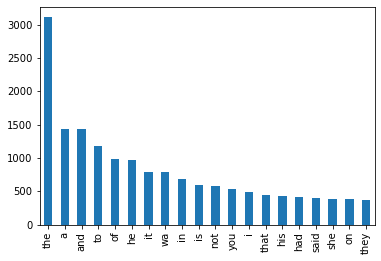

In [27]:
pd.Series(token).value_counts()[:20].plot(kind='bar')

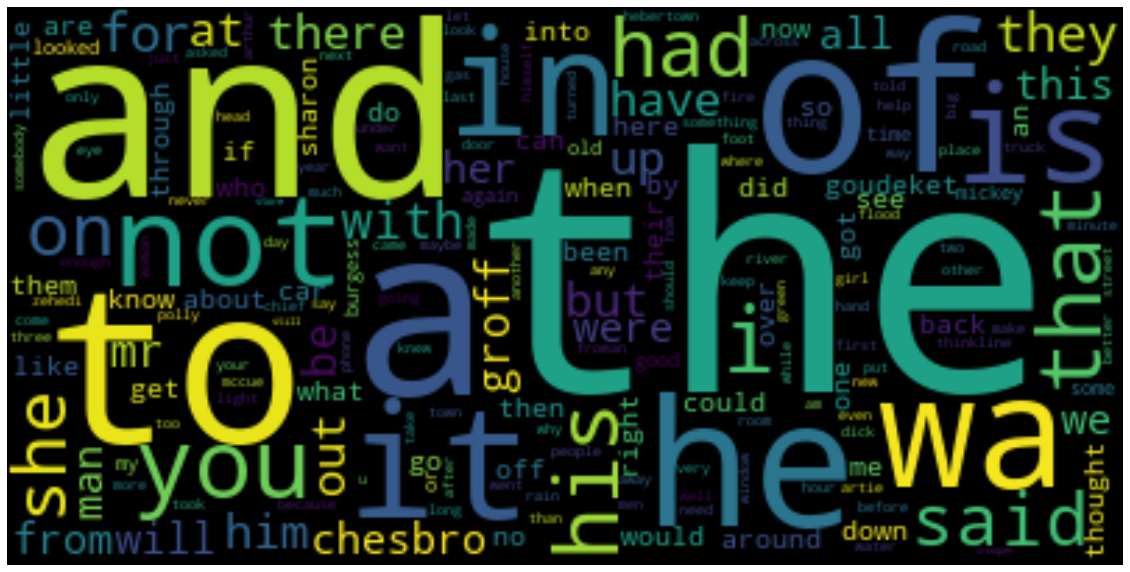

In [28]:
wordcloud(fdist)

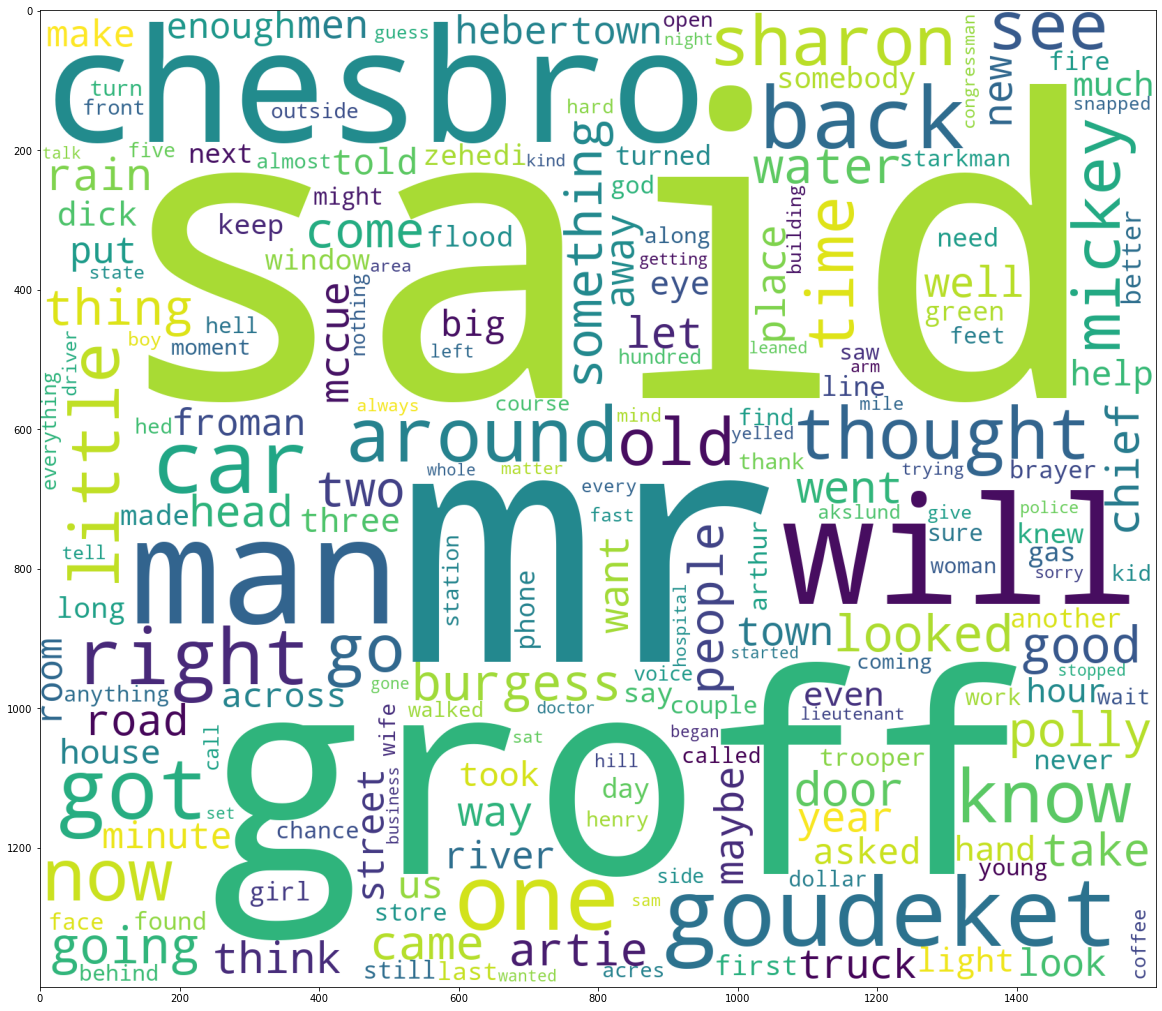

In [29]:
wordcloud_withoutstop(t1)

{5: 5591, 2: 8851, 3: 11959, 7: 3182, 9: 1085, 1: 1993, 4: 9285, 8: 1757, 10: 616, 16: 17, 6: 4109, 11: 357, 13: 94, 14: 55, 12: 225, 15: 24, 21: 4, 20: 2, 17: 3, 19: 1, 40: 1, 18: 1}


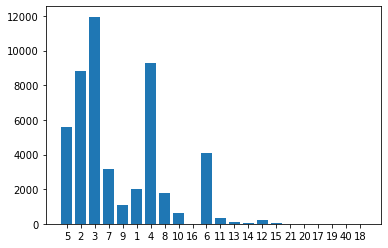

In [30]:
freq_wrt_len(dataf)

In [31]:
tagged = pos_tagging(token)

Counter({'NN': 10737, 'DT': 5441, 'IN': 5238, 'PRP': 3902, 'VBD': 3659, 'JJ': 3361, 'RB': 3230, 'VB': 2335, 'CC': 1784, 'TO': 1174, 'VBN': 1097, 'VBP': 1082, 'VBZ': 1049, 'VBG': 1032, 'PRP$': 846, 'MD': 721, 'RP': 560, 'NNS': 383, 'CD': 361, 'WRB': 267, 'WP': 261, 'EX': 181, 'WDT': 161, 'JJR': 103, 'JJS': 75, 'RBR': 65, 'PDT': 54, 'NNP': 33, 'FW': 7, 'RBS': 6, 'WP$': 5, "''": 1, 'UH': 1})


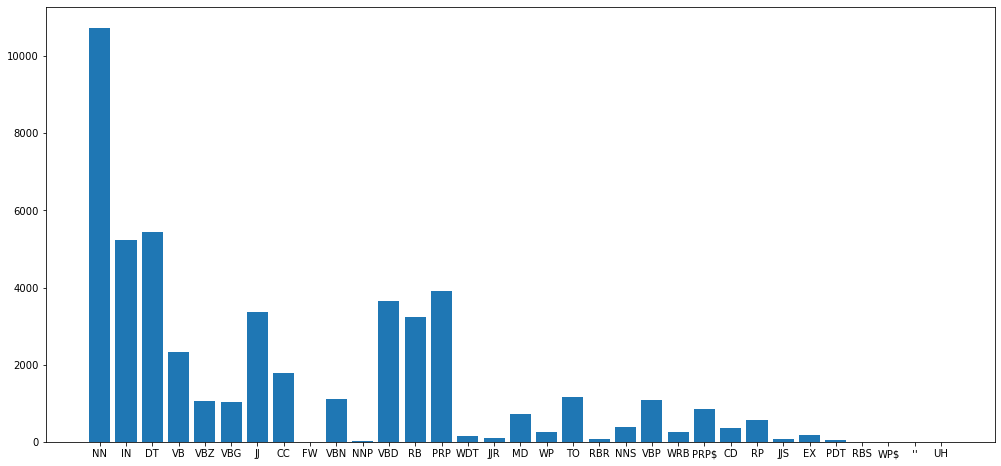

In [32]:
tagwithfreq(tagged)

# For T2

In [33]:
t2 = f2.read()

In [34]:
t2 = remove_not_needed_text(t2)

In [35]:
t2 = remove_chap(t2)

In [36]:
t2 = to_lowercase(t2)

In [37]:
t2 = remove_apos(t2)

In [38]:
t2 = remove_link(t2)

In [39]:
t2 = remove_punc_num(t2)

In [40]:
token = tokenize(t2)

In [41]:
token = lemmatize_word(token)

In [42]:
fdist = freqdist(token)
dataf = pd.DataFrame(list(fdist.items()), columns = ["Word","Frequency"]) 
print(dataf)

           Word  Frequency
0         start          6
1            of       1001
2           the       2326
3       project          1
4     gutenberg          1
...         ...        ...
4856      magic          1
4857      april          3
4858   shangore          1
4859       goal          1
4860    procure          1

[4861 rows x 2 columns]


<AxesSubplot:>

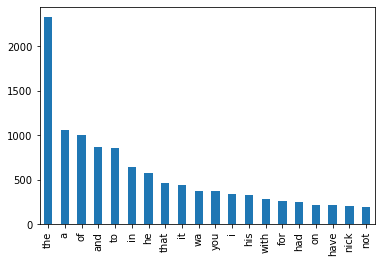

In [43]:
pd.Series(token).value_counts()[:20].plot(kind='bar')

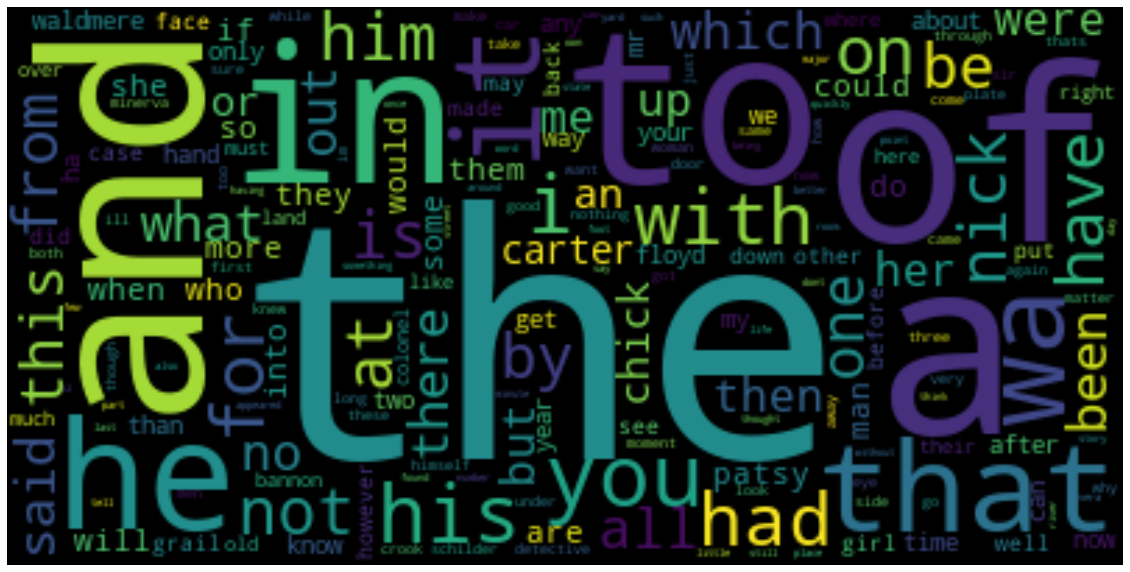

In [44]:
wordcloud(fdist)

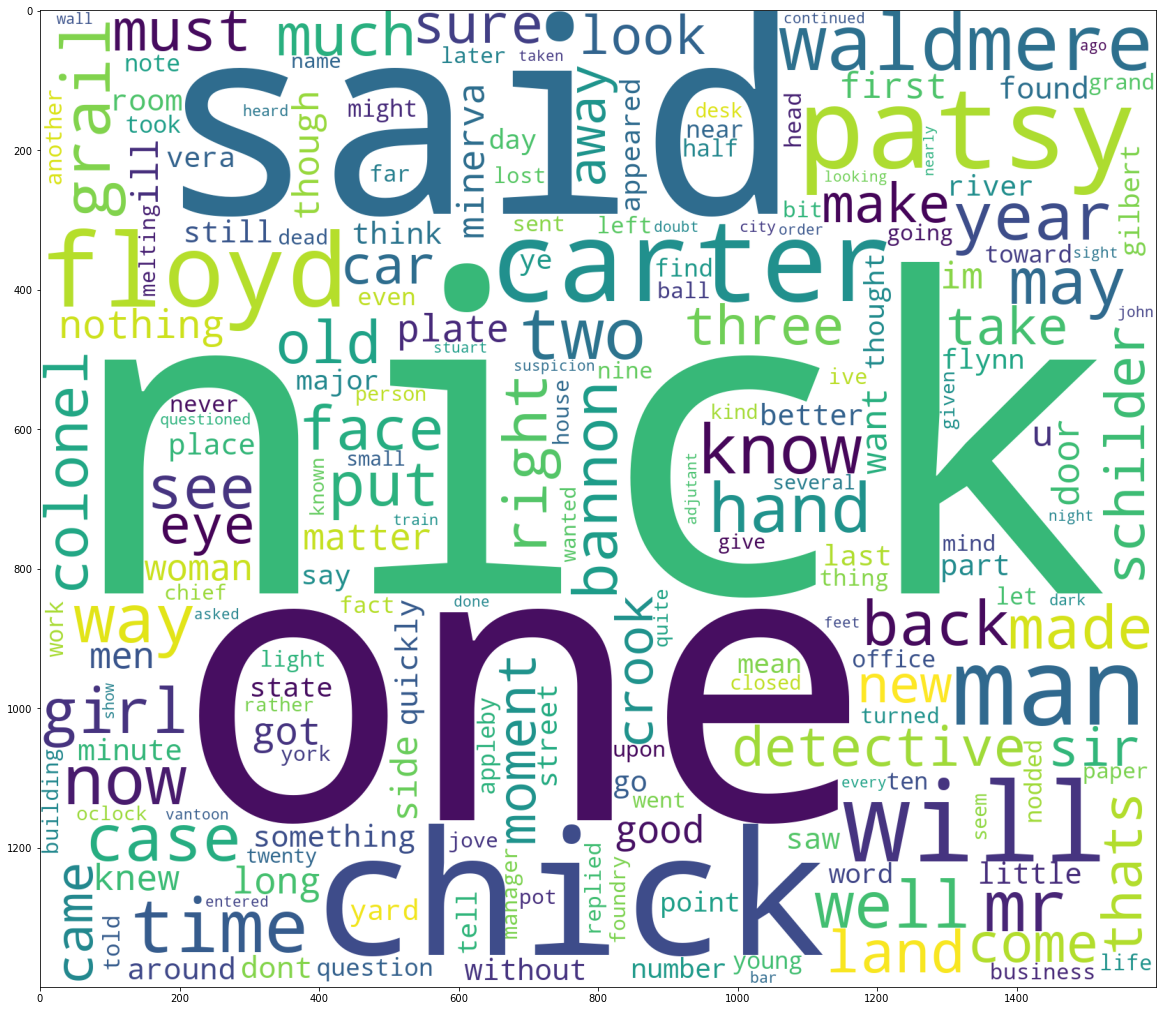

In [45]:
wordcloud_withoutstop(t2)

{5: 3780, 2: 6076, 3: 7586, 7: 2252, 9: 993, 4: 6919, 6: 2768, 1: 1479, 11: 251, 12: 138, 10: 515, 8: 1559, 15: 7, 13: 52, 14: 23, 17: 2, 16: 3, 20: 1}


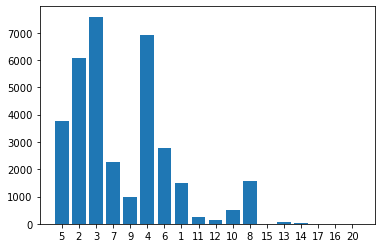

In [46]:
freq_wrt_len(dataf)

In [47]:
tagged = pos_tagging(token)

Counter({'NN': 7841, 'IN': 4253, 'DT': 4209, 'JJ': 2537, 'RB': 2128, 'PRP': 2089, 'VBD': 1993, 'VB': 1462, 'VBN': 1121, 'CC': 1103, 'TO': 852, 'VBP': 701, 'VBG': 683, 'PRP$': 617, 'VBZ': 495, 'MD': 449, 'CD': 329, 'NNS': 253, 'RP': 237, 'WP': 226, 'WRB': 218, 'WDT': 209, 'JJR': 90, 'EX': 81, 'JJS': 70, 'RBR': 61, 'PDT': 57, 'FW': 16, 'NNP': 10, 'RBS': 9, 'WP$': 5})


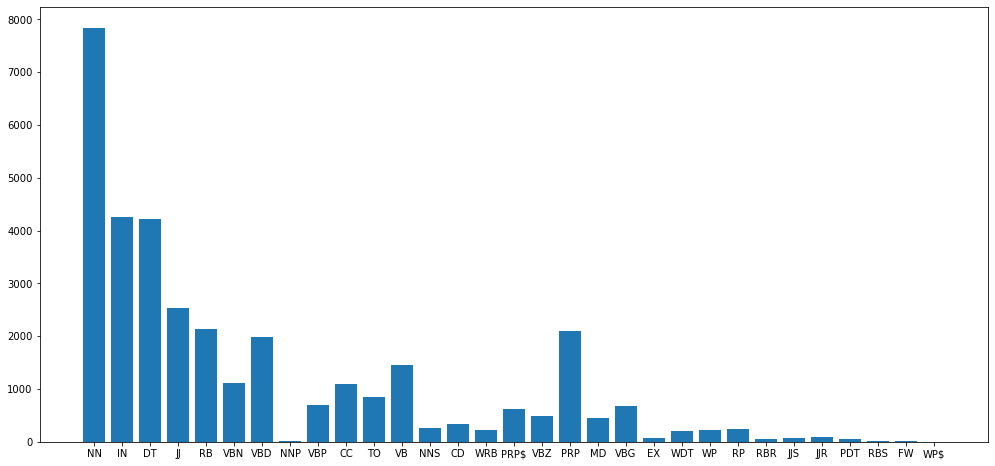

In [48]:
tagwithfreq(tagged)